# Pi Day 2022!
## (belated, of course)

The $\pi$-adjacent question this year has to do with packing a circle.  The first bright idea was to work on general solutions for packing unit circles into a minimal larger circle.  This turns out to be **very hard**, and in fact an open problem:  would be a great $\pi$ day project if I had nothing but time on my hands.  Ha.

But packing circles is still attractive, so how about limiting the problem?  Let's start by packing *two* unit circles into a minimal larger circle.

## Infrastructure

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def ellipse(a, b, n=360, xoff=0.0, yoff=0.0):
    """Define a finite set of  points on an ellipse.
    Special case:  if a==b, the ellipse is a circle."""
    theta = np.linspace(0, 2*np.pi, n)
    xx = xoff + a * np.cos(theta)
    yy = yoff + b * np.sin(theta)
    return xx, yy

## Algebra

Circle:  $x^2 + y^2 = r^2$

Ellipse:  $(x/a)^2 + (y/b)^2 = 1$

Ellipse moved one radius up along the $y$-axis, perched on the $x$-axis:  $(x/a)^2 + ((y-b)/b)^2 = 1$

## Two unit circles packed in a larger circle

Generalized packing of circles gets very difficult very quickly, but it's tractable with a very few circles.  It's trivial to pack a single unit circle in another circle:  the outer circle is also a unit circle, and the two are congruent.  With two unit circles, there's only one way for them to interact, and it's clearly minimal:  osculating.

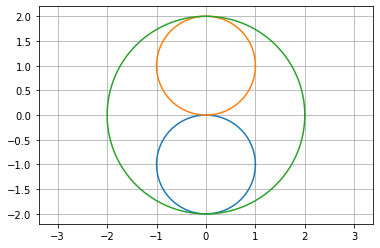

In [4]:
plt.plot(*ellipse(1, 1, yoff=-1));
plt.plot(*ellipse(1, 1, yoff=1));
plt.plot(*ellipse(2, 2, xoff=0))
plt.axis('equal');
plt.grid();

Convinced?  The two inner circles can't be closer to one another than they are because they osculate, that is, they're mutually tangential (_osculating_ sounds cooler, though).  So two unit circles can be packed together into a circle of radius $2$.

## Can we do better?
That is, can we pack two identical ellipses with unit semiminor axes and semimajor axes greater than one into a circle of radius $2$?
Yes!  Here's a picture of a pair of 15% larger ellipses in the same circle:

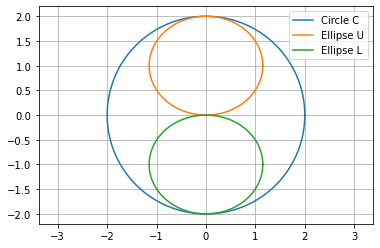

In [8]:
plt.plot(*ellipse(2, 2, xoff=0), label="Circle C");
plt.plot(*ellipse(1.15, 1, yoff=1), label="Ellipse U");
plt.plot(*ellipse(1.15, 1, yoff=-1), label="Ellipse L");
plt.axis('equal');
plt.legend();
plt.grid();

It *looks* like it worked.  The inner ellipses appear to keep beneath the $y=1.0$ line and above the $y=-1.0$ line.  It's a little trickier to *prove* that the ellipses stay within the boundaries of the circle.
### Proof that ellipse $U$ is inside circle $C$
The problem is symmetrical:  that is, the upper ellipse $U$ is inside the upper curve of $C$ if and only if the lower ellipse $L$ is inside the lower curve of $C$.  So let's just consider the upper ellipse.

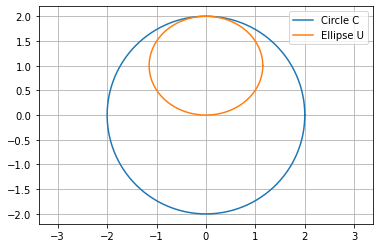

In [10]:
plt.plot(*ellipse(2, 2), label="Circle C");
plt.plot(*ellipse(1.15, 1, yoff=1), label="Ellipse U");
plt.axis('equal');
plt.legend();
plt.grid();

By the ellipse equation:
$$U(x) = 1 + \sqrt{1 - (x/1.15)^2}$$

In the special case for the circle:
$$C(x) = \sqrt{4 - x^2}$$

We hope that:
$$U(x=0) = C(x=0) = 2$$

That checks out for the ellipse:
$$\begin{eqnarray}
U & = & 1 + \sqrt{1 - (0/1.15)^2} \\
  & = & 1 + \sqrt{1} \\
  & = & 2
\end{eqnarray}$$

and for C:
$$\begin{eqnarray}
C & = & \sqrt{4 - 0^2} \\
  & = & \sqrt{4} \\
  & = & 2
\end{eqnarray}$$

That's fine for $x=0$, but $E(x=0)$ will *always* equal $C(x=0)$.  Any stretching in the $y$ direction only happens for $x\neq 0$.  So what about $E(x=\epsilon)$ vs. $C(x=\epsilon)$?


## General solution
Enclosing circle:  $x^2 + y^2 = 4$

Upper ellipse:  $(x-1)^2 + (y/b)^2 = 1$

Constraints: $b > 1$ and $y > 0$